In [ ]:
# THIS IS THE MOST RECENT WORK DID ON DEPRESSION PROJECT

# **Catestrophic Forgetting**

# Loading And Testing CNN model on EDAIC

Model loaded successfully.
77/77 [==============================] - 2s 20ms/step
CNN Model Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1897
           1       0.26      0.06      0.10       549

    accuracy                           0.75      2446
   macro avg       0.52      0.51      0.48      2446
weighted avg       0.66      0.75      0.69      2446


Accuracy for CNN Testing Set: 0.7522
F1 Score for CNN Testing Set: 0.0955


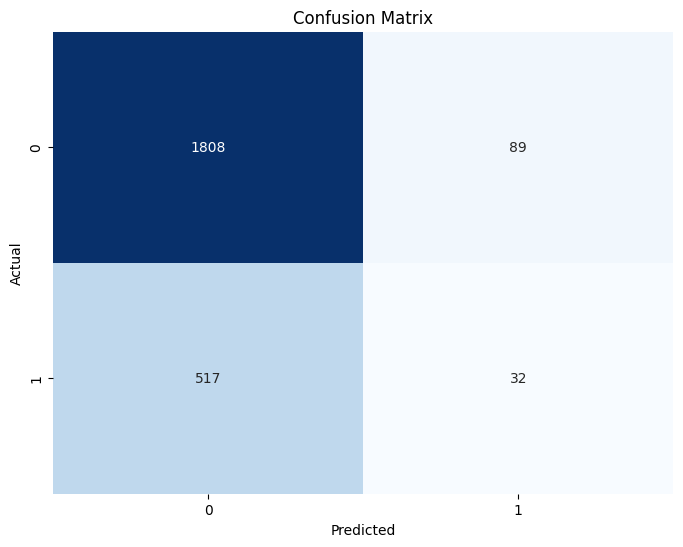

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved model
model_save_path = '/content/drive/MyDrive/Depression/Model/latest_CNN.h5'  # Update with your model's path
try:
    loaded_model = load_model(model_save_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading the model: {e}")
    raise

# Load and prepare the test data
test_data_path = '/content/drive/MyDrive/Depression/EDAIC Dataset/testing_labels.csv'  # Update with your test data's path
try:
    test_data = pd.read_csv(test_data_path)
except Exception as e:
    print(f"Error loading the test data: {e}")
    raise

# Check if the required columns are present
if 'Class' not in test_data.columns or 'name' not in test_data.columns:
    raise ValueError("Required columns ('Class' and 'name') are not present in the test data.")

X_test = test_data.drop(columns=['Class', 'name']).values
y_test = test_data['Class'].values

# Use the scaler fitted on the training data
# Assuming you have saved the scaler or can recreate it with the same parameters
scaler = StandardScaler()  # You should load or recreate the exact scaler used during training
X_test_scaled = scaler.fit_transform(X_test)

# Reshape the data if your model expects a specific input shape (example for CNN)
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Make predictions on the test data
try:
    y_pred = (loaded_model.predict(X_test_scaled) > 0.5).astype(int)
except Exception as e:
    print(f"Error during model prediction: {e}")
    raise

# Calculate and print the classification report and accuracy
print("CNN Model Classification Report for Testing Set:")
print(classification_report(y_test, y_pred))
accuracy_test = accuracy_score(y_test, y_pred)
print(f"\nAccuracy for CNN Testing Set: {accuracy_test:.4f}")

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score for CNN Testing Set: {f1:.4f}")

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Testing on Interview Dataset

Model loaded successfully.
47/47 [==============================] - 1s 15ms/step
CNN Model Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.42      0.94      0.58       624
           1       0.62      0.07      0.13       875

    accuracy                           0.43      1499
   macro avg       0.52      0.51      0.35      1499
weighted avg       0.54      0.43      0.31      1499


Accuracy for CNN Testing Set: 0.4323
F1 Score for CNN Testing Set: 0.1254


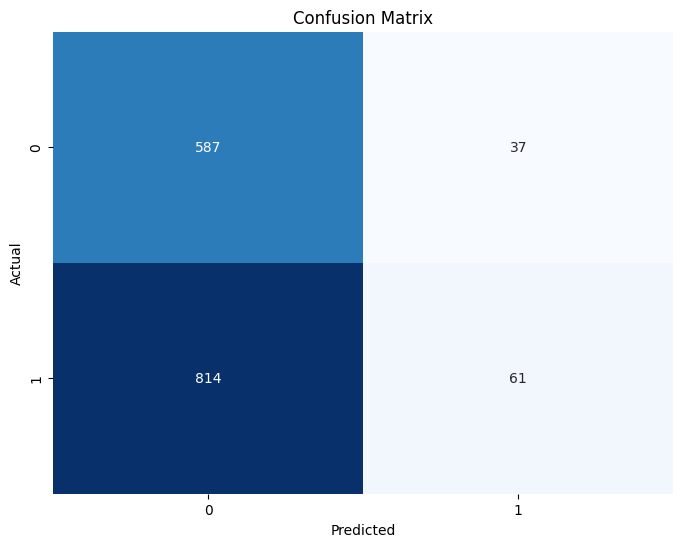

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved model
model_save_path = '/content/drive/MyDrive/Depression/Model/latest_CNN.h5'  # Update with your model's path
loaded_model = load_model(model_save_path)
print("Model loaded successfully.")

# Load and prepare the test data
test_data_path = '/content/drive/MyDrive/Depression/Android Dataset/Interview_test.csv'  # Update with your test data's path
test_data = pd.read_csv(test_data_path)

# Assuming your CSV has specific columns to drop (like 'name') and a 'Class' column for labels
X_test = test_data.drop(columns=['Class', 'name']).values
y_test = test_data['Class'].values

# Scale the features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Reshape the data if your model expects a specific input shape (example for CNN)
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Make predictions on the test data
y_pred = (loaded_model.predict(X_test_scaled) > 0.5).astype(int)

# Calculate and print the classification report and accuracy
print("CNN Model Classification Report for Testing Set:")
print(classification_report(y_test, y_pred))
accuracy_test = accuracy_score(y_test, y_pred)
print(f"\nAccuracy for CNN Testing Set: {accuracy_test:.4f}")

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score for CNN Testing Set: {f1:.4f}")

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Load and Fine-tune on Interview

In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the training and validation dataset
interview_df = pd.read_csv('/content/drive/MyDrive/Depression/Android Dataset/Interview_train.csv')

# Prepare the dataset by dropping the 'name' column and separating features and labels
X = interview_df.drop(columns=['name', 'Class']).values
y = interview_df['Class'].values

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Load the pre-trained model
model = load_model('/content/drive/MyDrive/Depression/Model/latest_CNN.h5')

# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fine-tune the model on the new dataset
model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=10, callbacks=[early_stopping])

# Save the fine-tuned model
model.save('/content/drive/MyDrive/Depression/Model/finetune_on_latest.h5')


Epoch 1/10
85/85 [==============================] - 5s 43ms/step - loss: 1.6367 - accuracy: 0.5586 - val_loss: 0.8403 - val_accuracy: 0.5831
Epoch 2/10
85/85 [==============================] - 5s 60ms/step - loss: 0.7810 - accuracy: 0.5371 - val_loss: 0.6697 - val_accuracy: 0.6202
Epoch 3/10
85/85 [==============================] - 3s 35ms/step - loss: 0.6681 - accuracy: 0.6054 - val_loss: 0.6167 - val_accuracy: 0.6855
Epoch 4/10
85/85 [==============================] - 3s 37ms/step - loss: 0.6207 - accuracy: 0.6570 - val_loss: 0.5846 - val_accuracy: 0.7433
Epoch 5/10
85/85 [==============================] - 4s 50ms/step - loss: 0.6040 - accuracy: 0.6707 - val_loss: 0.5593 - val_accuracy: 0.7730
Epoch 6/10
85/85 [==============================] - 7s 77ms/step - loss: 0.5596 - accuracy: 0.7112 - val_loss: 0.5295 - val_accuracy: 0.7834
Epoch 7/10
85/85 [==============================] - 4s 48ms/step - loss: 0.5338 - accuracy: 0.7372 - val_loss: 0.4989 - val_accuracy: 0.7953
Epoch 8/10
85

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Test Fine-Tuned Model On Interview

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# Load the test dataset
test_df = pd.read_csv('/content/drive/MyDrive/Depression/Android Dataset/Interview_test.csv')

# Prepare the test dataset by dropping the 'name' column and separating features and labels
X_test = test_df.drop(columns=['name', 'Class']).values
y_test = test_df['Class'].values

# Scale the features of the test set using the same scaler as used for training
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Load the fine-tuned model
fine_tuned_model = load_model('/content/drive/MyDrive/Depression/Model/finetune_on_latest.h5')

# Make predictions on the test set
predictions = fine_tuned_model.predict(X_test_scaled)
# Convert probabilities to class labels based on a threshold (0.5 for binary classification)
predicted_classes = (predictions > 0.5).astype(int)

# Calculate and print the accuracy on the test set
test_accuracy = accuracy_score(y_test, predicted_classes)
print(f'Test Accuracy: {test_accuracy}')

47/47 [==============================] - 1s 15ms/step
Test Accuracy: 0.6624416277518346


# Test Fine-Tuned Model On EDAIC

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# Load the test dataset
test_df = pd.read_csv('/content/drive/MyDrive/Depression/EDAIC Dataset/testing_labels.csv')

# Prepare the test dataset by dropping the 'name' column and separating features and labels
X_test = test_df.drop(columns=['name', 'Class']).values
y_test = test_df['Class'].values

# Scale the features of the test set using the same scaler as used for training
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Load the fine-tuned model
fine_tuned_model = load_model('/content/drive/MyDrive/Depression/Model/finetune_on_latest.h5')

# Make predictions on the test set
predictions = fine_tuned_model.predict(X_test_scaled)
# Convert probabilities to class labels based on a threshold (0.5 for binary classification)
predicted_classes = (predictions > 0.5).astype(int)

# Calculate and print the accuracy on the test set
test_accuracy = accuracy_score(y_test, predicted_classes)
print(f'Test Accuracy on EDAIC Dataset: {test_accuracy}')


77/77 [==============================] - 1s 12ms/step
Test Accuracy on EDAIC Dataset: 0.6578086672117743


# L1 L2 EWC

In [9]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load your datasets here
interview_df = pd.read_csv('/content/drive/MyDrive/Depression/Android Dataset/Interview_train.csv')
edaic_df = pd.read_csv('/content/drive/MyDrive/Depression/EDAIC Dataset/testing_labels.csv')

# Define dataset preparation functions
def prepare(df):
    X = df.drop(columns=['name', 'Class']).values
    y = df['Class'].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

# Prepare datasets
interview_X, interview_y = prepare(interview_df)
edaic_X, edaic_y = prepare(edaic_df)

# Define model architectures
def define_basic_cl_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(interview_X.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5)
    ])
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics='accuracy')
    return model

# Define training and evaluation functions
def train(model, X_train, y_train, X_val, y_val, epochs):
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs)
    val_acc = evaluate(model, X_val, y_val)
    return val_acc

def evaluate(model, X_test, y_test):
    y_pred_probs = model.predict(X_test)
    y_pred = tf.argmax(y_pred_probs, axis=1).numpy()  # Convert probabilities to class labels
    return accuracy_score(y_test, y_pred)

def train_with_ewc(model, X_train, X_val, y_train, y_val, epochs):
    # Train the model on the primary task
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs)

    # Compute Fisher Information matrix for the primary task
    # This should be replaced with your implementation of Fisher Information calculation
    F = compute_fisher_information(model, X_train, y_train)

    # Now you can perform the EWC training loop using the computed Fisher Information matrix
    # You need to define this part according to the specific implementation of EWC

    # After training, return the validation accuracy
    ewc_val_acc = evaluate(model, X_val, y_val)
    return ewc_val_acc

# Define a function to compute Fisher Information matrix
# You need to implement this function according to your specific task and model architecture
def compute_fisher_information(model, X_train, y_train):
    # Placeholder implementation
    # Replace this with your actual implementation
    return None

# L1 regularization training
l1_model = define_basic_cl_model()
l1_model.add(tf.keras.layers.ActivityRegularization(l1=0.01))
l1_val_acc = train(l1_model, interview_X, interview_y, edaic_X, edaic_y, epochs=6)
print(" Accuracy after L1 Regularization:", l1_val_acc)

# L2 regularization training
l2_model = define_basic_cl_model()
l2_model.add(tf.keras.layers.ActivityRegularization(l2=0.01))
l2_val_acc = train(l2_model, interview_X, interview_y, edaic_X, edaic_y, epochs=6)
print(" Accuracy after L2 Regularization:", l2_val_acc)

# Elastic Weight Consolidation (EWC) training
ewc_model = define_basic_cl_model()  # Using the same model architecture for simplicity
ewc_val_acc = train_with_ewc(ewc_model, interview_X, edaic_X, interview_y, edaic_y, epochs=6)
print(" Accuracy after EWC Training:", ewc_val_acc)


Epoch 1/6
106/106 [==============================] - 2s 14ms/step - loss: 0.4619 - accuracy: 0.8717 - val_loss: 1.0627 - val_accuracy: 0.6635
Epoch 2/6
106/106 [==============================] - 0s 4ms/step - loss: 0.1865 - accuracy: 0.9795 - val_loss: 1.1227 - val_accuracy: 0.6660
Epoch 3/6
106/106 [==============================] - 0s 4ms/step - loss: 0.1374 - accuracy: 0.9944 - val_loss: 1.1116 - val_accuracy: 0.6639
Epoch 4/6
106/106 [==============================] - 0s 4ms/step - loss: 0.1161 - accuracy: 0.9979 - val_loss: 1.2476 - val_accuracy: 0.6623
Epoch 5/6
106/106 [==============================] - 0s 4ms/step - loss: 0.1050 - accuracy: 0.9994 - val_loss: 1.2141 - val_accuracy: 0.6586
Epoch 6/6
77/77 [==============================] - 0s 2ms/step
Validation Accuracy after L1 Regularization: 0.6684382665576452
Epoch 1/6
106/106 [==============================] - 1s 6ms/step - loss: 0.5981 - accuracy: 0.8515 - val_loss: 1.0798 - val_accuracy: 0.6169
Epoch 2/6
106/106 [=======